# libraries

In [1]:
import os
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
import matplotlib.pyplot as plt
import librosa
from PIL import Image
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , LeakyReLU
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU

# dataset from kaggle

In [2]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# !kaggle competitions download -c iris
# !kaggle datasets download -d uciml/dogs-vs-cats
!kaggle datasets download -d biaiscience/dogs-vs-cats

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('dogsvscats/train')
zip_ref.close()

# addresses

In [4]:
a=os.listdir('/content/dogsvscats/train/train/train/')

In [5]:
len(a)

25000

# convert img to nparray

In [6]:
data=[]
label=[]
e=0
for i in range(0,10000):#len(a)):
  img=Image.open('/content/dogsvscats/train/train/train/'+a[i])
  img=img.resize((250,250))
  img=np.array(img)
  data.append(img)
  if a[i][0:3] == 'dog':
    label.append(0)
  else: label.append(1)
print('finish')

finish


# save and load data


# one hot data

In [7]:
data=np.asarray(data)
label=np.asarray(label)
label=keras.utils.to_categorical(label,num_classes=2)

print(data.shape,label.shape)

(10000, 250, 250, 3) (10000, 2)


In [8]:
cat , dog =0 ,0
for item in label:
  if item[0]==0:
    cat+=1
  else:
    dog+=1

print(cat,dog)

5052 4948


# train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)
print(X_train.shape)

(8000, 250, 250, 3)


# model

In [10]:
model = Sequential()
model.add(Conv2D(128, [5,5], strides = [2,2], padding = 'SAME', input_shape=(250, 250, 3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(256, [5,5], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(256, [1,1], padding = 'SAME'))
model.add(Conv2D(256, [3,3], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(Conv2D(512, [3,3], padding = 'SAME',activation = 'relu'))
model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(Conv2D(512, [3,3], padding = 'SAME', activation = 'relu'))
model.add(MaxPool2D(padding = 'same'))
model.add(Flatten())

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

opt = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [11]:
history=model.fit(X_train, y_train ,batch_size=8,epochs=8 ,validation_data=(X_test,y_test))

Epoch 1/8
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 106s 92ms/step - acc: 0.5363 - loss: 1.7776 - val_acc: 0.5995 - val_loss: 0.6594
Epoch 2/8
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 127s 88ms/step - acc: 0.5928 - loss: 0.6590 - val_acc: 0.6370 - val_loss: 0.6412
Epoch 3/8
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 142s 88ms/step - acc: 0.6628 - loss: 0.6122 - val_acc: 0.6665 - val_loss: 0.5986
Epoch 4/8
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 142s 88ms/step - acc: 0.7035 - loss: 0.5777 - val_acc: 0.7585 - val_loss: 0.4999
Epoch 5/8
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 91s 91ms/step - acc: 0.7491 - loss: 0.5185 - val_acc: 0.7580 - val_loss: 0.5055
Epoch 6/8
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 88s 88ms/step - acc: 0.7896 - loss: 0.4542 - val_acc: 0.8070 - val_loss: 0.4215
Epoch 7/8
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 142s 88ms/step - acc: 0.8292 - loss: 0.3811 - val_acc: 0.8245 - val_loss: 0.3975
Epoch 8/8
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 142s 88ms/step - acc: 0.8674 - loss: 0.3139 - val_acc: 0.8365 - val_loss: 0.3658


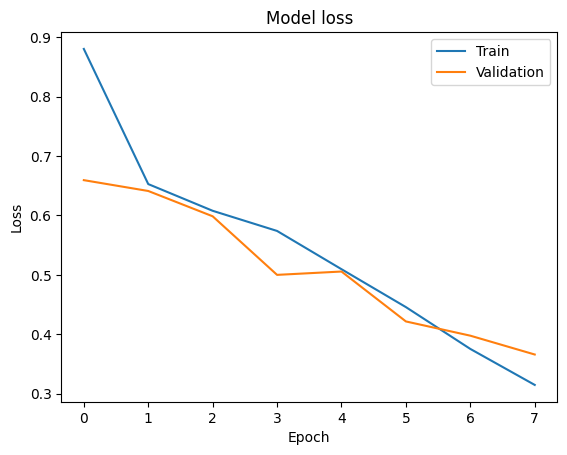

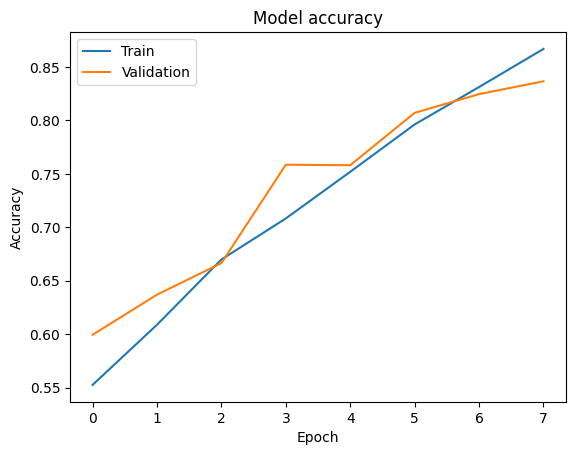

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the loss and accuracy
plot_loss(history)
plot_accuracy(history)


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step


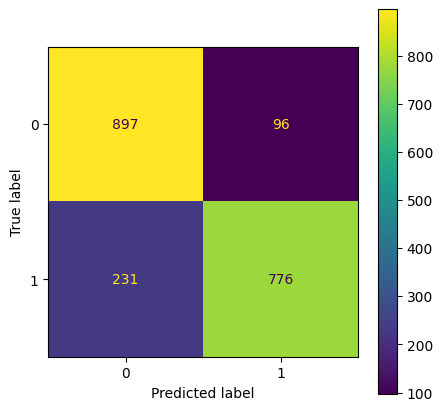

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax)
plt.show()
